# Training a machine learning classifier on resting state fMRI or structural MRI data

The goal is to train a classifier on MRI data. Two suitable data sets were identified.

## Getting the data

The ABIDE data set can be downloaded using nilearn. The data set contains resting state functional magnetic resonance imaging (rs-fMRI) data from multiple sites. Some of the participants had Autism Spectrum Disorder (ASD). This dataset could be used to train a classifier to distinguish ASD and control participants based on the resting state data.

The data were preprocessed with different pipelines. We will download the data preprocessed with the CPAC pipeline. For more on the differences between pipelines see [here](http://preprocessed-connectomes-project.org/abide/Pipelines.html).

We are setting quality_checked to "True", to only include subjects that passed quality control.



**Caution, the following code downloads the whole dataset. If you want only a subset downloaded, change `n_subjects` to how many subjects you want!**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install nilearn

                                              0.0/10.5 MB ? eta -:--:--
                                              0.2/10.5 MB 6.9 MB/s eta 0:00:02
     --                                       0.5/10.5 MB 6.8 MB/s eta 0:00:02
     ---                                      0.9/10.5 MB 6.8 MB/s eta 0:00:02
     ----                                     1.1/10.5 MB 6.3 MB/s eta 0:00:02
     ----                                     1.3/10.5 MB 5.8 MB/s eta 0:00:02
     -----                                    1.6/10.5 MB 5.8 MB/s eta 0:00:02
     -------                                  1.8/10.5 MB 5.9 MB/s eta 0:00:02
     --------                                 2.2/10.5 MB 6.0 MB/s eta 0:00:02
     ---------                                2.6/10.5 MB 6.4 MB/s eta 0:00:02
     -----------                              2.9/10.5 MB 6.5 MB/s eta 0:00:02
     ------------                             3.4/10.5 MB 6.7 MB/s eta 0:00:02
     --------------                           3.8/10.5 MB 6

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\kadiy\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\~andas\\_libs\\algos.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from nilearn import datasets
#CHANGE PATH (data_dir) TO WERE YOU WANT TO STORE THE DATA
abide = datasets.fetch_abide_pcp(data_dir="/kaggle/working/D",
                                n_subjects=200,
                                pipeline="cpac",
                                quality_checked=True,
                                )


Added README.md to /kaggle/working/D


Dataset created in /kaggle/working/D/ABIDE_pcp



 ...done. (1 seconds, 0 min)


Downloaded 98279424 of 104419884 bytes (94.1%,    0.5s remaining) ...done. (10 seconds, 0 min)


Downloaded 92864512 of 107986683 bytes (86.0%,    1.2s remaining) ...done. (9 seconds, 0 min)


Downloaded 98164736 of 110518334 bytes (88.8%,    0.9s remaining) ...done. (9 seconds, 0 min)


Downloaded 98435072 of 115167850 bytes (85.5%,    1.3s remaining) ...done. (9 seconds, 0 min)


Downloaded 102899712 of 102974496 bytes (99.9%,    0.0s remaining) ...done. (11 seconds, 0 min)


Downloaded 92717056 of 105723516 bytes (87.7%,    1.2s remaining) ...done. (10 seconds, 0 min)


Downloaded 100892672 of 108702932 bytes (92.8%,    0.7s remaining) ...done. (10 seconds, 0 min)


Downloaded 86671360 of 100532666 bytes (86.2%,    1.4s remaining) ...done. (10 seconds, 0 min)


Downloaded 100851712 of 110228275 bytes (91.5%,    0.9s remaining) ...done. (11 seconds, 0 min)


Downloaded 105242624 of 112533425 bytes (93.5%,    0.7s remaining) ...done. (11 seconds, 0 min)


Downloaded 93798400 of 110058848 bytes (85.2%,    1.3s remaining) ...done. (9 seconds, 0 min)


Downloaded 105611264 of 110376924 bytes (95.7%,    0.4s remaining) ...done. (11 seconds, 0 min)


Downloaded 101179392 of 102489954 bytes (98.7%,    0.1s remaining) ...done. (10 seconds, 0 min)


Downloaded 105914368 of 108195357 bytes (97.9%,    0.2s remaining) ...done. (11 seconds, 0 min)


Downloaded 90906624 of 105232630 bytes (86.4%,    2.9s remaining) ...done. (20 seconds, 0 min)


Downloaded 104202240 of 111013388 bytes (93.9%,    0.6s remaining) ...done. (11 seconds, 0 min)


Downloaded 96739328 of 104067786 bytes (93.0%,    0.7s remaining) ...done. (10 seconds, 0 min)


Downloaded 100818944 of 107633250 bytes (93.7%,    0.7s remaining) ...done. (11 seconds, 0 min)


Downloaded 96526336 of 106714902 bytes (90.5%,    0.9s remaining) ...done. (10 seconds, 0 min)


Downloaded 111779840 of 112515401 bytes (99.3%,    0.1s remaining) ...done. (12 seconds, 0 min)


Downloaded 107454464 of 111380261 bytes (96.5%,    0.4s remaining) ...done. (11 seconds, 0 min)


Downloaded 99762176 of 109481301 bytes (91.1%,    1.0s remaining) ...done. (11 seconds, 0 min)


Downloaded 106176512 of 118156589 bytes (89.9%,    1.1s remaining) ...done. (11 seconds, 0 min)


Downloaded 99065856 of 101609576 bytes (97.5%,    0.2s remaining) ...done. (9 seconds, 0 min)


Downloaded 105152512 of 114979022 bytes (91.5%,    0.9s remaining) ...done. (11 seconds, 0 min)


Downloaded 105889792 of 108536527 bytes (97.6%,    0.2s remaining) ...done. (11 seconds, 0 min)


Downloaded 90628096 of 100315008 bytes (90.3%,    0.9s remaining) ...done. (10 seconds, 0 min)


Downloaded 105848832 of 112518259 bytes (94.1%,    0.6s remaining) ...done. (11 seconds, 0 min)


Downloaded 94642176 of 105071443 bytes (90.1%,    1.0s remaining) ...done. (10 seconds, 0 min)


Downloaded 101048320 of 108382438 bytes (93.2%,    0.7s remaining) ...done. (11 seconds, 0 min)


Downloaded 100073472 of 105424334 bytes (94.9%,    0.5s remaining) ...done. (11 seconds, 0 min)


Downloaded 105971712 of 107697423 bytes (98.4%,    0.2s remaining) ...done. (11 seconds, 0 min)


Downloaded 93413376 of 102831611 bytes (90.8%,    0.9s remaining) ...done. (10 seconds, 0 min)


Downloaded 96059392 of 105868787 bytes (90.7%,    0.9s remaining) ...done. (10 seconds, 0 min)


Downloaded 101711872 of 110373167 bytes (92.2%,    1.7s remaining) ...done. (21 seconds, 0 min)


Downloaded 105766912 of 106676912 bytes (99.1%,    0.1s remaining) ...done. (10 seconds, 0 min)


Downloaded 88604672 of 95467541 bytes (92.8%,    0.7s remaining) ...done. (10 seconds, 0 min)


Downloaded 98459648 of 107811709 bytes (91.3%,    0.8s remaining) ...done. (10 seconds, 0 min)


Downloaded 101556224 of 103013827 bytes (98.6%,    0.1s remaining) ...done. (11 seconds, 0 min)


Downloaded 99336192 of 109340774 bytes (90.9%,    1.0s remaining) ...done. (11 seconds, 0 min)


Downloaded 94404608 of 110403873 bytes (85.5%,    1.3s remaining) ...done. (9 seconds, 0 min)


Downloaded 91635712 of 102741119 bytes (89.2%,    1.1s remaining) ...done. (10 seconds, 0 min)


Downloaded 112115712 of 113831652 bytes (98.5%,    0.2s remaining) ...done. (11 seconds, 0 min)


Downloaded 92545024 of 102054140 bytes (90.7%,    0.9s remaining) ...done. (10 seconds, 0 min)


Downloaded 102563840 of 109775490 bytes (93.4%,    0.7s remaining) ...done. (11 seconds, 0 min)


Downloaded 118038528 of 119693152 bytes (98.6%,    0.2s remaining) ...done. (12 seconds, 0 min)


Downloaded 102203392 of 114295718 bytes (89.4%,    2.2s remaining) ...done. (20 seconds, 0 min)


Downloaded 106782720 of 115673440 bytes (92.3%,    0.8s remaining) ...done. (11 seconds, 0 min)


Downloaded 104734720 of 109552949 bytes (95.6%,    0.5s remaining) ...done. (11 seconds, 0 min)


Downloaded 104521728 of 105507823 bytes (99.1%,    0.1s remaining) ...done. (11 seconds, 0 min)


Downloaded 112295936 of 122660208 bytes (91.6%,    0.9s remaining) ...done. (11 seconds, 0 min)


Downloaded 120414208 of 122066162 bytes (98.6%,    0.1s remaining) ...done. (12 seconds, 0 min)


Downloaded 112345088 of 125524859 bytes (89.5%,    1.2s remaining) ...done. (11 seconds, 0 min)


Downloaded 119496704 of 119530321 bytes (100.0%,    0.0s remaining) ...done. (12 seconds, 0 min)


Downloaded 116285440 of 128732335 bytes (90.3%,    1.2s remaining) ...done. (13 seconds, 0 min)


Downloaded 103022592 of 114050974 bytes (90.3%,    1.1s remaining) ...done. (12 seconds, 0 min)


Downloaded 110600192 of 118377207 bytes (93.4%,    0.8s remaining) ...done. (12 seconds, 0 min)


Downloaded 119881728 of 129287582 bytes (92.7%,    0.9s remaining) ...done. (12 seconds, 0 min)


Downloaded 110739456 of 120564753 bytes (91.9%,    0.9s remaining) ...done. (11 seconds, 0 min)


Downloaded 117809152 of 123902251 bytes (95.1%,    0.6s remaining) ...done. (12 seconds, 0 min)


Downloaded 116629504 of 122851217 bytes (94.9%,    0.6s remaining) ...done. (12 seconds, 0 min)


Downloaded 104448000 of 119903539 bytes (87.1%,    1.3s remaining) ...done. (10 seconds, 0 min)


Downloaded 114180096 of 124953879 bytes (91.4%,    1.0s remaining) ...done. (13 seconds, 0 min)


Downloaded 112525312 of 118668066 bytes (94.8%,    0.5s remaining) ...done. (11 seconds, 0 min)


Downloaded 115228672 of 121318546 bytes (95.0%,    0.6s remaining) ...done. (12 seconds, 0 min)


Downloaded 112533504 of 113306058 bytes (99.3%,    0.1s remaining) ...done. (11 seconds, 0 min)


Downloaded 117399552 of 120938259 bytes (97.1%,    0.3s remaining) ...done. (11 seconds, 0 min)


Downloaded 113573888 of 122574265 bytes (92.7%,    0.8s remaining) ...done. (11 seconds, 0 min)


Downloaded 119529472 of 122383426 bytes (97.7%,    0.3s remaining) ...done. (12 seconds, 0 min)


Downloaded 116072448 of 119210228 bytes (97.4%,    0.3s remaining) ...done. (13 seconds, 0 min)


Downloaded 112246784 of 116086868 bytes (96.7%,    0.3s remaining) ...done. (11 seconds, 0 min)


Downloaded 109969408 of 122156869 bytes (90.0%,    1.1s remaining) ...done. (11 seconds, 0 min)


Downloaded 122322944 of 125357066 bytes (97.6%,    0.3s remaining) ...done. (12 seconds, 0 min)


Downloaded 106201088 of 118740494 bytes (89.4%,    1.0s remaining) ...done. (10 seconds, 0 min)


Downloaded 112590848 of 117185869 bytes (96.1%,    0.4s remaining) ...done. (10 seconds, 0 min)


Downloaded 109961216 of 121608785 bytes (90.4%,    0.9s remaining) ...done. (10 seconds, 0 min)


Downloaded 115597312 of 116464120 bytes (99.3%,    0.1s remaining) ...done. (12 seconds, 0 min)


Downloaded 109928448 of 123786681 bytes (88.8%,    1.2s remaining) ...done. (11 seconds, 0 min)


Downloaded 41156608 of 47213495 bytes (87.2%,    0.6s remaining) ...done. (6 seconds, 0 min)


Downloaded 43024384 of 45661369 bytes (94.2%,    0.3s remaining) ...done. (5 seconds, 0 min)


Downloaded 40665088 of 48199382 bytes (84.4%,    0.8s remaining) ...done. (6 seconds, 0 min)


Downloaded 38494208 of 49613319 bytes (77.6%,    1.3s remaining) ...done. (6 seconds, 0 min)


Downloaded 39059456 of 50577093 bytes (77.2%,    1.3s remaining) ...done. (6 seconds, 0 min)


Downloaded 47333376 of 49448699 bytes (95.7%,    0.2s remaining) ...done. (6 seconds, 0 min)


Downloaded 40656896 of 48511473 bytes (83.8%,    0.8s remaining) ...done. (6 seconds, 0 min)


Downloaded 39993344 of 46588883 bytes (85.8%,    0.7s remaining) ...done. (6 seconds, 0 min)


Downloaded 38641664 of 49642517 bytes (77.8%,    1.2s remaining) ...done. (6 seconds, 0 min)


Downloaded 38199296 of 47760083 bytes (80.0%,    1.1s remaining) ...done. (6 seconds, 0 min)


Downloaded 38920192 of 49940089 bytes (77.9%,    1.2s remaining) ...done. (6 seconds, 0 min)


Downloaded 39550976 of 45604757 bytes (86.7%,    0.7s remaining) ...done. (6 seconds, 0 min)


Downloaded 39165952 of 48202845 bytes (81.3%,    1.0s remaining) ...done. (6 seconds, 0 min)


Downloaded 40878080 of 48390941 bytes (84.5%,    0.8s remaining) ...done. (6 seconds, 0 min)


Downloaded 40435712 of 48377928 bytes (83.6%,    0.9s remaining) ...done. (6 seconds, 0 min)


Downloaded 39403520 of 48219077 bytes (81.7%,    1.0s remaining) ...done. (6 seconds, 0 min)


Downloaded 39886848 of 47925361 bytes (83.2%,    0.9s remaining) ...done. (6 seconds, 0 min)


Downloaded 37642240 of 46953991 bytes (80.2%,    1.1s remaining) ...done. (6 seconds, 0 min)


Downloaded 38150144 of 47918543 bytes (79.6%,    1.1s remaining) ...done. (6 seconds, 0 min)


Downloaded 37511168 of 49707872 bytes (75.5%,    1.4s remaining) ...done. (6 seconds, 0 min)


Downloaded 38281216 of 49440455 bytes (77.4%,    1.3s remaining) ...done. (6 seconds, 0 min)


Downloaded 39026688 of 48948252 bytes (79.7%,    1.1s remaining) ...done. (6 seconds, 0 min)


Downloaded 40673280 of 48581667 bytes (83.7%,    0.8s remaining) ...done. (6 seconds, 0 min)


Downloaded 39501824 of 48028723 bytes (82.2%,    0.9s remaining) ...done. (6 seconds, 0 min)


Downloaded 39542784 of 48926488 bytes (80.8%,    1.0s remaining) ...done. (6 seconds, 0 min)


Downloaded 99835904 of 103307732 bytes (96.6%,    0.3s remaining) ...done. (11 seconds, 0 min)


Downloaded 101941248 of 104869475 bytes (97.2%,    0.3s remaining) ...done. (11 seconds, 0 min)


Downloaded 88023040 of 95474541 bytes (92.2%,    0.7s remaining) ...done. (10 seconds, 0 min)


Downloaded 102490112 of 107870342 bytes (95.0%,    0.5s remaining) ...done. (11 seconds, 0 min)


Downloaded 101597184 of 103306942 bytes (98.3%,    0.2s remaining) ...done. (11 seconds, 0 min)


Downloaded 90865664 of 102761508 bytes (88.4%,    1.1s remaining) ...done. (10 seconds, 0 min)


Downloaded 90439680 of 101015070 bytes (89.5%,    1.0s remaining) ...done. (10 seconds, 0 min)


Downloaded 85139456 of 97961086 bytes (86.9%,    1.1s remaining) ...done. (9 seconds, 0 min)


Downloaded 100720640 of 102625489 bytes (98.1%,    0.2s remaining) ...done. (10 seconds, 0 min)


Downloaded 99573760 of 105533255 bytes (94.4%,    0.6s remaining) ...done. (11 seconds, 0 min)


Downloaded 99418112 of 107072040 bytes (92.9%,    0.8s remaining) ...done. (11 seconds, 0 min)


Downloaded 97992704 of 106884892 bytes (91.7%,    0.8s remaining) ...done. (10 seconds, 0 min)


Downloaded 99573760 of 100240888 bytes (99.3%,    0.1s remaining) ...done. (10 seconds, 0 min)


Downloaded 99418112 of 100130834 bytes (99.3%,    0.1s remaining) ...done. (11 seconds, 0 min)


Downloaded 94347264 of 102821793 bytes (91.8%,    0.8s remaining) ...done. (10 seconds, 0 min)


Downloaded 101605376 of 106424505 bytes (95.5%,    0.5s remaining) ...done. (11 seconds, 0 min)


Downloaded 102727680 of 104764204 bytes (98.1%,    0.2s remaining) ...done. (11 seconds, 0 min)


Downloaded 89899008 of 101762563 bytes (88.3%,    1.1s remaining) ...done. (10 seconds, 0 min)


Downloaded 93184000 of 103476731 bytes (90.1%,    1.0s remaining) ...done. (10 seconds, 0 min)


Downloaded 88907776 of 99319344 bytes (89.5%,    1.0s remaining) ...done. (10 seconds, 0 min)


Downloaded 101097472 of 106144149 bytes (95.2%,    0.5s remaining) ...done. (11 seconds, 0 min)


Downloaded 94068736 of 98283071 bytes (95.7%,    0.4s remaining) ...done. (10 seconds, 0 min)


Downloaded 91537408 of 96666269 bytes (94.7%,    0.5s remaining) ...done. (10 seconds, 0 min)


Downloaded 105201664 of 109179568 bytes (96.4%,    0.4s remaining) ...done. (11 seconds, 0 min)


Downloaded 91619328 of 104315489 bytes (87.8%,    1.2s remaining) ...done. (10 seconds, 0 min)


Downloaded 100442112 of 100755881 bytes (99.7%,    0.0s remaining) ...done. (11 seconds, 0 min)


Downloaded 103473152 of 104049488 bytes (99.4%,    0.1s remaining) ...done. (11 seconds, 0 min)


Downloaded 81158144 of 88100076 bytes (92.1%,    0.7s remaining) ...done. (9 seconds, 0 min)


Downloaded 77692928 of 82149656 bytes (94.6%,    0.4s remaining) ...done. (9 seconds, 0 min)


Downloaded 81403904 of 81739638 bytes (99.6%,    0.0s remaining) ...done. (8 seconds, 0 min)


Downloaded 70148096 of 79578720 bytes (88.1%,    0.9s remaining) ...done. (8 seconds, 0 min)


Downloaded 77488128 of 79167312 bytes (97.9%,    0.2s remaining) ...done. (8 seconds, 0 min)


Downloaded 84189184 of 85134814 bytes (98.9%,    0.1s remaining) ...done. (8 seconds, 0 min)


Downloaded 80748544 of 84685546 bytes (95.4%,    0.4s remaining) ...done. (9 seconds, 0 min)


Downloaded 77463552 of 86433443 bytes (89.6%,    0.9s remaining) ...done. (9 seconds, 0 min)


Downloaded 88539136 of 89827896 bytes (98.6%,    0.1s remaining) ...done. (10 seconds, 0 min)


Downloaded 67977216 of 82403522 bytes (82.5%,    1.4s remaining) ...done. (8 seconds, 0 min)


Downloaded 77561856 of 89196011 bytes (87.0%,    1.1s remaining) ...done. (9 seconds, 0 min)


Downloaded 73449472 of 86734034 bytes (84.7%,    1.2s remaining) ...done. (8 seconds, 0 min)


Downloaded 79716352 of 85240741 bytes (93.5%,    0.5s remaining) ...done. (9 seconds, 0 min)


Downloaded 77037568 of 89255889 bytes (86.3%,    1.0s remaining) ...done. (8 seconds, 0 min)


Downloaded 82993152 of 89696906 bytes (92.5%,    0.6s remaining) ...done. (9 seconds, 0 min)


Downloaded 78053376 of 88226898 bytes (88.5%,    0.9s remaining) ...done. (8 seconds, 0 min)


Downloaded 75735040 of 85619700 bytes (88.5%,    1.0s remaining) ...done. (9 seconds, 0 min)


Downloaded 80175104 of 85749288 bytes (93.5%,    0.5s remaining) ...done. (9 seconds, 0 min)


Downloaded 79241216 of 80406871 bytes (98.6%,    0.1s remaining) ...done. (8 seconds, 0 min)


Downloaded 77438976 of 86334444 bytes (89.7%,    0.7s remaining) ...done. (8 seconds, 0 min)


Downloaded 81068032 of 82453566 bytes (98.3%,    0.1s remaining) ...done. (8 seconds, 0 min)


Downloaded 74670080 of 81189491 bytes (92.0%,    0.7s remaining) ...done. (9 seconds, 0 min)


Downloaded 76537856 of 80788761 bytes (94.7%,    0.4s remaining) ...done. (9 seconds, 0 min)


Downloaded 86695936 of 88438528 bytes (98.0%,    0.2s remaining) ...done. (8 seconds, 0 min)


Downloaded 77242368 of 82657156 bytes (93.4%,    0.5s remaining) ...done. (8 seconds, 0 min)


Downloaded 81453056 of 82083586 bytes (99.2%,    0.1s remaining) ...done. (8 seconds, 0 min)


Downloaded 80363520 of 88311033 bytes (91.0%,    0.6s remaining) ...done. (8 seconds, 0 min)


Downloaded 79052800 of 84832785 bytes (93.2%,    0.5s remaining) ...done. (8 seconds, 0 min)


Downloaded 75612160 of 83958604 bytes (90.1%,    0.7s remaining) ...done. (8 seconds, 0 min)


Downloaded 71122944 of 85078204 bytes (83.6%,    1.3s remaining) ...done. (8 seconds, 0 min)


Downloaded 75644928 of 85316744 bytes (88.7%,    1.0s remaining) ...done. (9 seconds, 0 min)


Downloaded 79347712 of 83650716 bytes (94.9%,    0.4s remaining) ...done. (9 seconds, 0 min)


Downloaded 70565888 of 84223335 bytes (83.8%,    1.3s remaining) ...done. (8 seconds, 0 min)


Downloaded 192176128 of 204073805 bytes (94.2%,    1.0s remaining) ...done. (18 seconds, 0 min)


Downloaded 159465472 of 173382781 bytes (92.0%,    1.2s remaining) ...done. (16 seconds, 0 min)


Downloaded 166961152 of 170223641 bytes (98.1%,    0.3s remaining) ...done. (16 seconds, 0 min)


Downloaded 165625856 of 178755670 bytes (92.7%,    0.9s remaining) ...done. (14 seconds, 0 min)


Downloaded 175325184 of 176860851 bytes (99.1%,    0.1s remaining) ...done. (16 seconds, 0 min)


Downloaded 180207616 of 180574638 bytes (99.8%,    0.0s remaining) ...done. (18 seconds, 0 min)


Downloaded 164823040 of 168785580 bytes (97.7%,    0.4s remaining) ...done. (16 seconds, 0 min)


Downloaded 181575680 of 190222690 bytes (95.5%,    0.8s remaining) ...done. (18 seconds, 0 min)


Downloaded 171876352 of 178264954 bytes (96.4%,    0.5s remaining) ...done. (15 seconds, 0 min)


Downloaded 167034880 of 167834099 bytes (99.5%,    0.1s remaining) ...done. (16 seconds, 0 min)


Downloaded 171474944 of 186119228 bytes (92.1%,    1.2s remaining) ...done. (16 seconds, 0 min)


Downloaded 175874048 of 178023482 bytes (98.8%,    0.2s remaining) ...done. (17 seconds, 0 min)


Downloaded 161366016 of 169555833 bytes (95.2%,    0.8s remaining) ...done. (17 seconds, 0 min)


Downloaded 169287680 of 175713626 bytes (96.3%,    0.5s remaining) ...done. (14 seconds, 0 min)


Downloaded 175095808 of 178961772 bytes (97.8%,    0.4s remaining) ...done. (17 seconds, 0 min)


Downloaded 184410112 of 185573106 bytes (99.4%,    0.1s remaining) ...done. (17 seconds, 0 min)


Downloaded 157622272 of 172936675 bytes (91.1%,    1.3s remaining) ...done. (15 seconds, 0 min)


Downloaded 165150720 of 175332801 bytes (94.2%,    0.9s remaining) ...done. (17 seconds, 0 min)


Downloaded 170434560 of 180845447 bytes (94.2%,    0.9s remaining) ...done. (16 seconds, 0 min)


Downloaded 184680448 of 191049237 bytes (96.7%,    0.5s remaining) ...done. (15 seconds, 0 min)


Downloaded 167329792 of 175033265 bytes (95.6%,    0.7s remaining) ...done. (17 seconds, 0 min)


Downloaded 174309376 of 183210908 bytes (95.1%,    0.7s remaining) ...done. (15 seconds, 0 min)


Downloaded 170991616 of 183517814 bytes (93.2%,    1.1s remaining) ...done. (17 seconds, 0 min)


Downloaded 190390272 of 193110768 bytes (98.6%,    0.2s remaining) ...done. (17 seconds, 0 min)


Downloaded 167985152 of 181419865 bytes (92.6%,    1.0s remaining) ...done. (15 seconds, 0 min)


Downloaded 170770432 of 186111162 bytes (91.8%,    1.3s remaining) ...done. (16 seconds, 0 min)


Downloaded 164077568 of 171247565 bytes (95.8%,    0.7s remaining) ...done. (17 seconds, 0 min)


Downloaded 160555008 of 171921893 bytes (93.4%,    1.0s remaining) ...done. (16 seconds, 0 min)


Downloaded 164405248 of 180173552 bytes (91.2%,    1.4s remaining) ...done. (16 seconds, 0 min)


Downloaded 171892736 of 172996955 bytes (99.4%,    0.1s remaining) ...done. (16 seconds, 0 min)


Downloaded 163823616 of 176194779 bytes (93.0%,    1.1s remaining) ...done. (16 seconds, 0 min)


Downloaded 159727616 of 163068163 bytes (98.0%,    0.2s remaining) ...done. (13 seconds, 0 min)


Downloaded 173129728 of 173242576 bytes (99.9%,    0.0s remaining) ...done. (16 seconds, 0 min)


Downloaded 174432256 of 183055905 bytes (95.3%,    0.8s remaining) ...done. (18 seconds, 0 min)


Downloaded 172367872 of 183734194 bytes (93.8%,    1.0s remaining) ...done. (17 seconds, 0 min)


Downloaded 165085184 of 168430232 bytes (98.0%,    0.3s remaining) ...done. (16 seconds, 0 min)


Downloaded 161177600 of 176080760 bytes (91.5%,    1.2s remaining) ...done. (15 seconds, 0 min)


## Extracting the functional connectivity data

As basis for training the classifier we will use the functional connectivity matrix.

In [ ]:
len(abide.func_preproc)

200

In [ ]:
abide.description


".. _abide_dataset:\n\nABIDE PCP dataset\n=================\n\nAccess\n------\nSee :func:`nilearn.datasets.fetch_abide_pcp`.\n\nNotes\n-----\nThe Autism Brain Imaging Data Exchange (ABIDE) dataset provides previously\ncollected resting state functional magnetic resonance imaging datasets\nfrom 539 individuals with ASD and 573 typical controls for the purpose\nof data sharing in the broader scientific community. This grass-root\ninitiative involved 16 international sites, sharing 20 samples yielding\n1112 datasets composed of both MRI data and an extensive array of\nphenotypic information common across nearly all sites (see below).\n\nNote that this is the preprocessed version of ABIDE provided by the\npreprocess connectome projects (PCP).\n\nSee :footcite:t:`Nielsen2013`.\n\nContent\n-------\n    :'phenotypic': Behavioral information.\n\nReferences\n----------\n\n.. footbibliography::\n\nFor more information about this dataset's structure:\n\nhttp://preprocessed-connectomes-project.git

In [ ]:
abide.func_preproc[0]

'/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz'

We need to decide which parcellation to use. (https://mniopenresearch.org/articles/1-3).

In [ ]:
parcellations=datasets.fetch_atlas_basc_multiscale_2015(data_dir=None, url=None, resume=True, verbose=1, resolution=None, version='sym')

atlas_filename = parcellations.scale064


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/basc_multiscale_2015



 ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/basc_multiscale_2015/53337d5c408465aa257d35f81c13413b/1861819..... done.


In [ ]:
atlas_filename

'/root/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz'

This is what the atlas looks like:

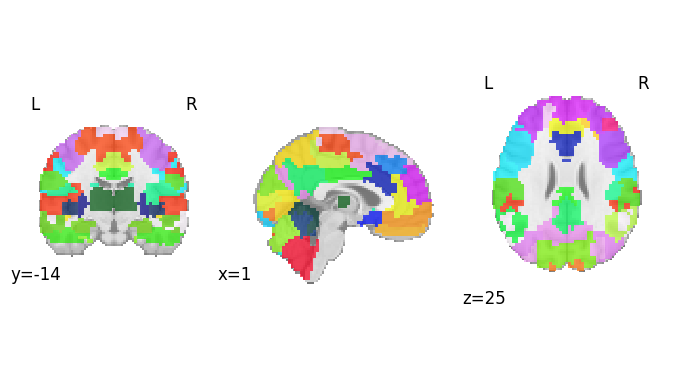

In [ ]:
from nilearn import plotting

plotting.plot_roi(atlas_filename, draw_cross=False)

We'll store the filenames of the functional scans in a list that we can later loop over. To test the functions, we will only use the first image in our data set.

In [ ]:
fmri_filenames = abide.func_preproc[0]
fmri_filenames

'/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz'

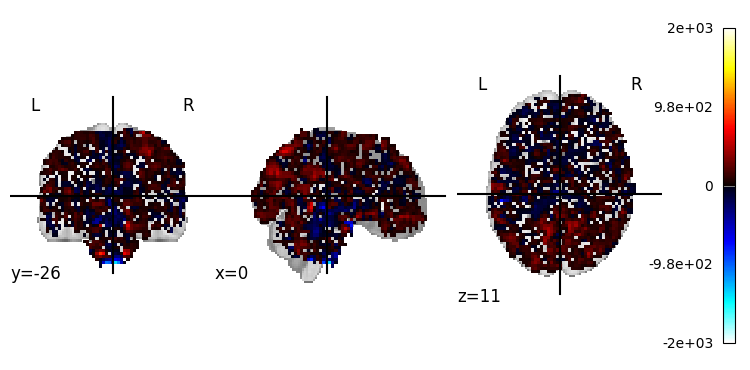

In [ ]:
from nilearn import plotting
from nilearn import image
first_Img = image.index_img(fmri_filenames, 1)
plotting.plot_stat_map(first_Img, threshold = 'auto')

Using NiftiLabelsMasker we will create a mask on our functional images with the labels of the chosen atlas and extract the time series in each ROI. Because the data is already preprocessed, we do not need to regress out any confounds.

In [ ]:
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas_filename,
                           standardize=True,
                           memory='nilearn_cache',
                           verbose=1)

time_series = masker.fit_transform(fmri_filenames)
time_series

[NiftiLabelsMasker.wrapped] loading data from /root/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz', 
{ 'background_label': 0,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'keep_masked_labels': True,
  'labels': None,
  'labels_img': '/root/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': 

array([[ 0.34946893,  0.21255069,  0.32162783, ...,  0.04455612,
        -0.74631306, -0.74398049],
       [ 1.25591628,  1.68573687,  1.23214702, ...,  1.99766476,
         2.28793563,  1.3609068 ],
       [ 0.79581354,  0.44042242, -0.64273411, ...,  1.16094275,
         1.29602784, -0.12425872],
       ...,
       [-1.22488812, -1.44788828, -1.02308577, ..., -1.50944423,
        -1.40493041, -1.35589217],
       [ 0.15812634, -1.17902071, -0.2163547 , ..., -0.22004795,
         0.20060848, -1.18520845],
       [ 0.91473484,  1.32615049,  0.51178034, ...,  0.96631393,
         0.59919195,  0.367358  ]])

The correlation matrix of the ROIs is computed.

In [ ]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
correlation_matrix.shape

(64, 64)

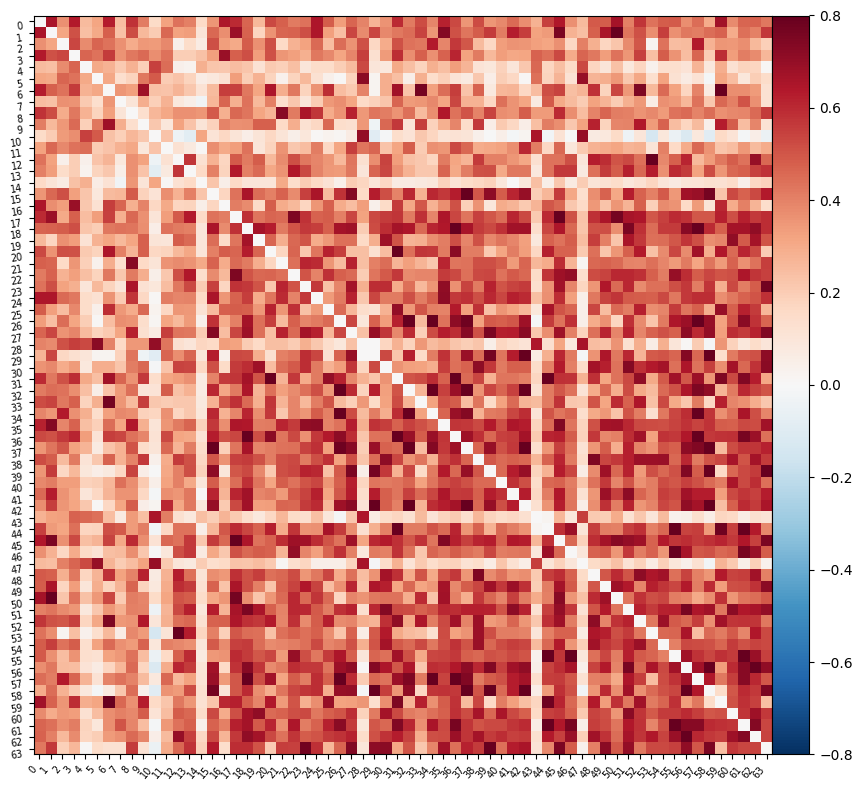

In [ ]:
import numpy as np

np.fill_diagonal(correlation_matrix, 0)

plotting.plot_matrix(correlation_matrix, figure=(10, 8),
                     labels=range(time_series.shape[-1]),
                     vmax=0.8, vmin=-0.8, reorder=False)

All right, this seems to work! Now let's combine this in a for loop.

In [ ]:
fmri_filenames = abide.func_preproc
fmri_filenames

['/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050004_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050005_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050006_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050007_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050008_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050010_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050011_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050012_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050013_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050014_func_preproc.nii.gz',
 '/kaggle/working/D/ABIDE_pcp/cpac/nofilt_noglobal/Pit

In [ ]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

# make list of filenames
fmri_filenames = abide.func_preproc

# load atlas
multiscale = datasets.fetch_atlas_basc_multiscale_2015()
atlas_filename = multiscale.scale064

# initialize masker object
masker = NiftiLabelsMasker(labels_img=atlas_filename,
                           standardize=True,
                           memory='nilearn_cache',
                           verbose=0)

# initialize correlation measure
correlation_measure = ConnectivityMeasure(kind='correlation', vectorize=True,
                                         discard_diagonal=True)

all_features = [] # here is where we will put the data (a container)

for i,sub in enumerate(fmri_filenames):
    # extract the timeseries from the ROIs in the atlas
    time_series = masker.fit_transform(sub)
    # create a region x region correlation matrix
    correlation_matrix = correlation_measure.fit_transform([time_series])[0]
    # add to our container
    all_features.append(correlation_matrix)
    # keep track of status
    print('finished %s of %s'%(i+1,len(fmri_filenames)))

finished 1 of 200
finished 2 of 200
finished 3 of 200
finished 4 of 200
finished 5 of 200
finished 6 of 200
finished 7 of 200
finished 8 of 200
finished 9 of 200
finished 10 of 200
finished 11 of 200
finished 12 of 200
finished 13 of 200
finished 14 of 200
finished 15 of 200
finished 16 of 200
finished 17 of 200
finished 18 of 200
finished 19 of 200
finished 20 of 200
finished 21 of 200
finished 22 of 200
finished 23 of 200
finished 24 of 200
finished 25 of 200
finished 26 of 200
finished 27 of 200
finished 28 of 200
finished 29 of 200
finished 30 of 200
finished 31 of 200
finished 32 of 200
finished 33 of 200
finished 34 of 200
finished 35 of 200
finished 36 of 200
finished 37 of 200
finished 38 of 200
finished 39 of 200
finished 40 of 200
finished 41 of 200
finished 42 of 200
finished 43 of 200
finished 44 of 200
finished 45 of 200
finished 46 of 200
finished 47 of 200
finished 48 of 200
finished 49 of 200
finished 50 of 200
finished 51 of 200
finished 52 of 200
finished 53 of 200
fi

Let us save this data to our data directory.

In [ ]:
import numpy as np

np.savez_compressed('/mnt/ABIDE_BASC064_features', a = all_features)

We can load them again like this:

In [ ]:
feat_file = '/mnt/ABIDE_BASC064_features.npz'
X_features = np.load(feat_file)['a']

X_features.shape

(200, 2016)

In [ ]:
print(X_features[0].shape)

(2016,)


## Get target variable Y

Accompanying the data set is a csv file containing the phenotypic data. According to the Phenotypic Data Legend which can be downloaded [here](http://fcon_1000.projects.nitrc.org/indi/abide/abide_I.html), the column DX_GROUP has the information about the diagnostic group each participant is in. It is coded as:

- 1 = Autism
- 2 = Control

Let's import the csv.

In [ ]:
import pandas as pd
phenotypic = pd.read_csv("/kaggle/working/D/ABIDE_pcp/Phenotypic_V1_0b_preprocessed1.csv")

In [ ]:
phenotypic

,Unnamed: 0.1,Unnamed: 0,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_notes_rater_1,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP
0,0,1,50002,1,50002,PITT,no_filename,1,1,16.77,...,NaN,OK,NaN,fail,ic-parietal-cerebellum,OK,NaN,fail,ERROR #24,1
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,NaN,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,NaN,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,NaN,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,1107,1108,51583,1108,51583,SBL,SBL_0051583,1,2,35.00,...,NaN,OK,NaN,OK,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1108,1108,1109,51584,1109,51584,SBL,SBL_0051584,1,2,49.00,...,NaN,OK,NaN,maybe,vmpfc dropout,OK,NaN,OK,NaN,0
1109,1109,1110,51585,1110,51585,SBL,SBL_0051585,1,1,27.00,...,NaN,OK,NaN,maybe,ic-cerebellum-temporal_lobe,OK,NaN,OK,NaN,0
1110,1110,1111,51606,1111,51606,MAX_MUN,MaxMun_a_0051606,1,2,29.00,...,NaN,OK,NaN,maybe,ic-cerebellum,OK,NaN,OK,NaN,0


We'll use the file names to get the right values from the DX_GROUP column.

In [ ]:
file_ids = []
# get the file IDs from the file names
for f in fmri_filenames:
    file_ids.append(f[-27:-20])

y_asd = []
for i in range(len(phenotypic)):
    for j in range(len(file_ids)):
        if file_ids[j] in phenotypic.FILE_ID[i]:
            y_asd.append(phenotypic.DX_GROUP[i]-1)


In [ ]:
y_asd

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1]

In [ ]:

import pandas as pd

# Convert the list to a Pandas Series
y_asd_series = pd.Series(y_asd)

# Use the unique_counts() method
unique_counts = y_asd_series.value_counts()

# Print the unique counts
print(unique_counts)

0    111
1     89
Name: count, dtype: int64


## Prepare the data for machine learning

For our test run we will divide our data set into a training and a test set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_features, # x
                                                  y_asd, # y
                                                  test_size = 0.3, # 80%/20% split
                                                  shuffle = True, # shuffle dataset before splitting
                                                  stratify = y_asd,  # keep distribution of ASD consistent between sets
                                                  random_state = 123 # same split each time
                                                 )


In [ ]:
X_train.shape

(140, 2016)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_asd, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(len(X_train), -1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(len(X_test), -1)).reshape(X_test.shape)


We visualize the distributions:

<Axes: ylabel='count'>

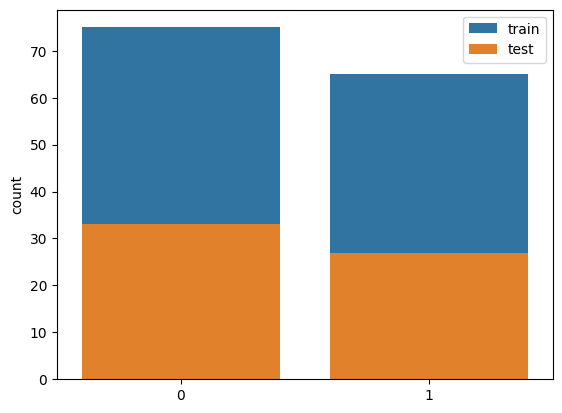

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = y_train, label = "train")
sns.countplot(x = y_val, label = "test")

## Build Model

### Linear SVC

The classifier that is going to be used here is going to be a Linear Support Vector Classification (SVC). We will use cross-validation to estimate our accuracy.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict, cross_val_score

l_svc = LinearSVC(max_iter=100000) # more iterations than the default
l_svc.fit(X_train, y_train)

# predict
y_pred_svc = cross_val_predict(l_svc, X_train, y_train, cv=10)
# scores
acc_svc = cross_val_score(l_svc, X_train, y_train, cv=10)

print("Accuracy:", acc_svc)
print("Mean accuracy:", acc_svc.mean())

Accuracy: [0.57142857 0.57142857 0.78571429 0.5        0.71428571 0.71428571
 0.71428571 0.71428571 0.71428571 0.85714286]
Mean accuracy: 0.6857142857142857


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, accuracy_score
y_pred = l_svc.predict(X_test)
# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")



# Predict classes


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, specificity, and sensitivity
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = recall
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

ROC AUC Score: 0.6805555555555555
Confusion Matrix:
[[25 11]
 [ 8 16]]
Precision: 0.5925925925925926
Recall: 0.6666666666666666
Accuracy: 0.6833333333333333
Specificity: 0.6944444444444444
Sensitivity: 0.6666666666666666



### Naive Bayes

Another classifier that can be used is Gaussian Naive Bayes (GNB). It uses Bayes theorem to update probabilities. It also works with the assumption that every pair of features is conditionally independent, given the class. Gaussian Naive Bayes additionally assumes a gaussian distribution of likelihoods.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train, sample_weight=None)

# predict
y_pred_gnb = cross_val_predict(gnb, X_train, y_train, cv=10)
# scores
acc_gnb = cross_val_score(gnb, X_train, y_train, cv=10)

print("Accuracy:", acc_gnb)
print("Mean accuracy:", acc_gnb.mean())

Accuracy: [0.64285714 0.85714286 0.71428571 0.57142857 0.71428571 0.57142857
 0.35714286 0.64285714 0.5        0.5       ]
Mean accuracy: 0.6071428571428571


In [ ]:
y_pred = gnb.predict(X_test)
# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")



# Predict classes
y_pred = gnb.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, specificity, and sensitivity
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = recall
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

ROC AUC Score: 0.5694444444444444
Confusion Matrix:
[[23 13]
 [12 12]]
Precision: 0.48
Recall: 0.5
Accuracy: 0.5833333333333334
Specificity: 0.6388888888888888
Sensitivity: 0.5


In [ ]:
# load csv and check out possible additional features
print(phenotypic.columns[2:-10])

Index(['SUB_ID', 'X', 'subject', 'SITE_ID', 'FILE_ID', 'DX_GROUP', 'DSM_IV_TR',
       'AGE_AT_SCAN', 'SEX', 'HANDEDNESS_CATEGORY', 'HANDEDNESS_SCORES', 'FIQ',
       'VIQ', 'PIQ', 'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE',
       'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_RRB_TOTAL_C',
       'ADI_R_ONSET_TOTAL_D', 'ADI_R_RSRCH_RELIABLE', 'ADOS_MODULE',
       'ADOS_TOTAL', 'ADOS_COMM', 'ADOS_SOCIAL', 'ADOS_STEREO_BEHAV',
       'ADOS_RSRCH_RELIABLE', 'ADOS_GOTHAM_SOCAFFECT', 'ADOS_GOTHAM_RRB',
       'ADOS_GOTHAM_TOTAL', 'ADOS_GOTHAM_SEVERITY', 'SRS_VERSION',
       'SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION', 'SRS_COMMUNICATION',
       'SRS_MOTIVATION', 'SRS_MANNERISMS', 'SCQ_TOTAL', 'AQ_TOTAL',
       'COMORBIDITY', 'CURRENT_MED_STATUS', 'MEDICATION_NAME',
       'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED',
       'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED',
       'VINELAND_COMMUNICATION_STANDARD', 'VINELAND_PERSONAL_V_SCALED',

In [ ]:
X_train.shape

(140, 2016)

In [ ]:
X_train1=np.array(X_train)

NameError: name 'np' is not defined

In [ ]:
y_train = np.array(y_train)

# Neural Networks

In [ ]:
y_val = np.array(y_val)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Assuming you have your data stored in 'X_train' and 'y_train'
# X_train is your input data of size (num_samples, 2016, 1)
# y_train is your target labels

# Define your neural network architecture
model = Sequential([
    Flatten(input_shape=(2016,1)),  # Flatten the input matrix
    Dense(1024, activation='relu'),  # Add a fully connected layer with 1024 units
    Dropout(0.5),  # Add dropout to prevent overfitting
    Dense(512, activation='relu'),   # Add another fully connected layer with 512 units
    Dropout(0.5),  # Add dropout
    Dense(256, activation='relu'),   # Add another fully connected layer with 256 units
    Dropout(0.5),  # Add dropout
    Dense(128, activation='relu'),   # Add another fully connected layer with 128 units
    Dropout(0.5),  # Add dropout
    Dense(64, activation='relu'),    # Add another fully connected layer with 64 units
    Dropout(0.5),  # Add dropout
    Dense(1, activation='sigmoid')   # Output layer with sigmoid activation for binary classification
])
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train1, y_train, epochs=20, batch_size=32, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2016)              0         
                                                                 
 dense (Dense)               (None, 1024)              2065408   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [ ]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 11ms/step


array([[0.6798481 ],
       [0.6935997 ],
       [0.6197105 ],
       [0.45951238],
       [0.52926874],
       [0.51940256],
       [0.20751834],
       [0.61655974],
       [0.5223382 ],
       [0.61077386],
       [0.5520108 ],
       [0.6647024 ],
       [0.12803623],
       [0.12067419],
       [0.10076454],
       [0.48534974],
       [0.7466842 ],
       [0.57104295],
       [0.1940424 ],
       [0.43769383],
       [0.5009595 ],
       [0.25977635],
       [0.5416962 ],
       [0.10581367],
       [0.628721  ],
       [0.58596057],
       [0.28820866],
       [0.3179375 ],
       [0.29926705],
       [0.64987767],
       [0.68371147],
       [0.7326593 ],
       [0.39452687],
       [0.16133562],
       [0.28552166],
       [0.23345159],
       [0.42499533],
       [0.6926332 ],
       [0.17416099],
       [0.69072974],
       [0.3206658 ],
       [0.2142144 ],
       [0.56151956],
       [0.6508967 ],
       [0.4959419 ],
       [0.2238423 ],
       [0.56233716],
       [0.543

In [ ]:
y_pred = model.predict(X_test)
# Compute ROC AUC score
import numpy as np

y_pred = np.where(y_pred > 0.5, 1, 0)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")



# Predict classes


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, specificity, and sensitivity
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = recall
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

2/2 [==============================] - 0s 11ms/step
ROC AUC Score: 0.513888888888889
Confusion Matrix:
[[19 17]
 [12 12]]
Precision: 0.41379310344827586
Recall: 0.5
Accuracy: 0.5166666666666667
Specificity: 0.5277777777777778
Sensitivity: 0.5


#LSTMs

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout, BatchNormalization

# Define the model
model1 = Sequential([
    LSTM(64, return_sequences=True, input_shape=(2016, 1)),  # LSTM layer for temporal modeling
    BatchNormalization(),
    Dropout(0.5),

    LSTM(32),  # Another LSTM layer
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),  # Fully connected layer
    BatchNormalization(),
    Dropout(0.5),

    Dense(32, activation='relu'),  # Another fully connected layer
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model1.summary()

# Fit the model
model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2016, 64)          16896     
                                                                 
 batch_normalization (Batch  (None, 2016, 64)          256       
 Normalization)                                                  
                                                                 
 dropout_5 (Dropout)         (None, 2016, 64)          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 32)               

In [ ]:
y_pred = model1.predict(X_test)
y_pred

2/2 [==============================] - 2s 462ms/step


array([[0.52901113],
       [0.5768259 ],
       [0.5413392 ],
       [0.5153228 ],
       [0.4905177 ],
       [0.5119692 ],
       [0.46656522],
       [0.5234906 ],
       [0.5112621 ],
       [0.5315862 ],
       [0.51870185],
       [0.55393636],
       [0.47059655],
       [0.46715358],
       [0.46907288],
       [0.5079323 ],
       [0.5604279 ],
       [0.52829075],
       [0.4747209 ],
       [0.48972   ],
       [0.4957363 ],
       [0.4720504 ],
       [0.48973018],
       [0.4681492 ],
       [0.5433363 ],
       [0.51172173],
       [0.47730005],
       [0.47974145],
       [0.49738342],
       [0.55213803],
       [0.5596186 ],
       [0.5771203 ],
       [0.4859906 ],
       [0.46749103],
       [0.48136225],
       [0.47264165],
       [0.4986067 ],
       [0.5282204 ],
       [0.47448906],
       [0.54078627],
       [0.4801873 ],
       [0.47567487],
       [0.5300965 ],
       [0.5405983 ],
       [0.51021737],
       [0.46907565],
       [0.5261994 ],
       [0.496

In [ ]:
y_pred = model1.predict(X_test)
# Compute ROC AUC score
y_pred = np.where(y_pred > 0.45, 1, 0)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")



# Predict classes


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, specificity, and sensitivity
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = recall
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

2/2 [==============================] - 1s 458ms/step
ROC AUC Score: 0.5
Confusion Matrix:
[[ 0 36]
 [ 0 24]]
Precision: 0.4
Recall: 1.0
Accuracy: 0.4
Specificity: 0.0
Sensitivity: 1.0


#DEEP BELIEF NETWORKS

In [ ]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
# Assuming you have your functional connectivity data loaded into X and corresponding labels into y
# X should be a numpy array of correlation matrices, and y should be the corresponding labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_asd, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(len(X_train), -1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(len(X_test), -1)).reshape(X_test.shape)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the Deep Belief Network architecture
class DBN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(DBN, self).__init__()
        self.rbm1 = nn.Linear(input_size, hidden_size1)
        self.rbm2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.sigmoid(self.rbm1(x))
        x = self.sigmoid(self.rbm2(x))
        x = self.softmax(self.output(x))
        return x

# Initialize DBN model
input_size = X_train.shape[1]
hidden_size1 = 500
hidden_size2 = 200
output_size = 2  # Assuming binary classification
dbn_model = DBN(input_size, hidden_size1, hidden_size2, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dbn_model.parameters(), lr=0.001)

# Define batch size and number of epochs
batch_size = 32
epochs = 20

# Create DataLoader for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training the DBN model
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = dbn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss}")

# Evaluate the model



from sklearn.metrics import confusion_matrix, classification_report
import torch

dbn_model.eval()
with torch.no_grad():
    outputs = dbn_model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

    # Convert tensors to numpy arrays



   # Predict classes
y_pred = predicted.numpy()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, specificity, and sensitivity
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = recall
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")





Epoch 1, Loss: 3.5693572759628296
Epoch 2, Loss: 3.18410861492157
Epoch 3, Loss: 2.8482845425605774
Epoch 4, Loss: 2.6281886994838715
Epoch 5, Loss: 2.3681987822055817
Epoch 6, Loss: 2.157558888196945
Epoch 7, Loss: 2.0343549847602844
Epoch 8, Loss: 1.8750145733356476
Epoch 9, Loss: 1.8223811388015747
Epoch 10, Loss: 1.7640427350997925
Epoch 11, Loss: 1.745016098022461
Epoch 12, Loss: 1.7065421342849731
Epoch 13, Loss: 1.6855486631393433
Epoch 14, Loss: 1.6770261526107788
Epoch 15, Loss: 1.6545022428035736
Epoch 16, Loss: 1.6469036936759949
Epoch 17, Loss: 1.6422907412052155
Epoch 18, Loss: 1.6396308541297913
Epoch 19, Loss: 1.6384475529193878
Epoch 20, Loss: 1.6372426748275757
Confusion Matrix:
[[21  5]
 [ 4 10]]
ROC AUC Score: 0.7609890109890111
Precision: 0.6666666666666666
Recall: 0.7142857142857143
Accuracy: 0.775
Specificity: 0.8076923076923077
Sensitivity: 0.7142857142857143


In [ ]:
# Define the Deep Belief Network architecture
class DBN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(DBN, self).__init__()
        self.rbm1 = nn.Linear(input_size, hidden_size1)
        self.rbm2 = nn.Linear(hidden_size1, hidden_size2)
        self.rbm3 = nn.Linear(hidden_size2, hidden_size3)
        self.output = nn.Linear(hidden_size3, output_size)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.sigmoid(self.rbm1(x))
        x = self.sigmoid(self.rbm2(x))
        x = self.sigmoid(self.rbm3(x))
        x = self.softmax(self.output(x))
        return x

# Initialize DBN model with more complex architecture
input_size = X_train.shape[1]
hidden_size1 = 800
hidden_size2 = 500
hidden_size3 = 200
output_size = 2  # Assuming binary classification
dbn_model1 = DBN(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dbn_model1.parameters(), lr=0.001)

# Define batch size and number of epochs
batch_size = 32
epochs = 20

# Create DataLoader for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training the DBN model
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = dbn_model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss}")

# Evaluate the model
dbn_model1.eval()
with torch.no_grad():
    outputs = dbn_model1(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

    # Convert tensors to numpy arrays

    predicted_np = predicted.numpy()

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted_np)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Compute precision, recall, accuracy, specificity, and sensitivity
    precision = precision_score(y_test, predicted_np)
    recall = recall_score(y_test, predicted_np)
    accuracy = accuracy_score(y_test, predicted_np)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    sensitivity = recall
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Specificity: {specificity}")
    print(f"Sensitivity: {sensitivity}")


Epoch 1, Loss: 3.6003119349479675
Epoch 2, Loss: 3.409073054790497
Epoch 3, Loss: 3.2591464519500732
Epoch 4, Loss: 2.8210883736610413
Epoch 5, Loss: 2.4852278530597687
Epoch 6, Loss: 2.2054284811019897
Epoch 7, Loss: 2.067093461751938
Epoch 8, Loss: 2.084484189748764
Epoch 9, Loss: 2.0523335933685303
Epoch 10, Loss: 1.9435187578201294
Epoch 11, Loss: 1.8891266584396362
Epoch 12, Loss: 1.7346347570419312
Epoch 13, Loss: 1.720149964094162
Epoch 14, Loss: 1.7070880830287933
Epoch 15, Loss: 1.7108292281627655
Epoch 16, Loss: 1.7003449499607086
Epoch 17, Loss: 1.699787586927414
Epoch 18, Loss: 1.6973854899406433
Epoch 19, Loss: 1.6716745793819427
Epoch 20, Loss: 1.667490154504776
Confusion Matrix:
[[21  5]
 [ 5  9]]
ROC AUC Score: 0.7609890109890111
Precision: 0.6428571428571429
Recall: 0.6428571428571429
Accuracy: 0.75
Specificity: 0.8076923076923077
Sensitivity: 0.6428571428571429


#RANDOM FOREST WITH GRID_SEARCHCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier()
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [10, 20, 30, None],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum number of samples required at each leaf node
}
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:")
print(grid_search.best_params_)

# Evaluate the model with the best parameters on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Parameters: {accuracy}")
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score

# Train your Random Forest model (best_rf_model) before using this code.

# Predict probabilities for the positive class
y_probs = best_rf_model.predict_proba(X_test)[:, 1]
y_pred = best_rf_model.predict(X_test)
# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")



# Predict classes
y_pred = best_rf_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision, recall, specificity, and sensitivity
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
sensitivity = recall
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

Best Parameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy with Best Parameters: 0.65
ROC AUC Score: 0.6318681318681318
Confusion Matrix:
[[18  8]
 [ 6  8]]
Precision: 0.5
Recall: 0.5714285714285714
Accuracy: 0.65
Specificity: 0.6923076923076923
Sensitivity: 0.5714285714285714
